In [9]:
import pandas as pd
import matplotlib.pyplot as plot

In [5]:
# loading the csv
pokemon_df = pd.read_csv('metadata_pokemon.csv')
moves_df = pd.read_csv('metadata_pokemon_moves.csv')

pokemon_df['name'] = pokemon_df['name'].str.replace('-', ' ')
pokemon_df

,name,id,hp,attack,defense,special_attack,special_defense,speed,height,weight,type_1,type_2
0,Bulbasaur,1,45,49,49,65,65,45,7,69,Grass,Poison
1,Ivysaur,2,60,62,63,80,80,60,10,130,Grass,Poison
2,Venusaur,3,80,82,83,100,100,80,20,1000,Grass,Poison
3,Charmander,4,39,52,43,60,50,65,6,85,Fire,NaN
4,Charmeleon,5,58,64,58,80,65,80,11,190,Fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
993,Iron Moth,994,80,70,60,140,110,110,12,360,Fire,Poison
994,Iron Thorns,995,100,134,110,70,84,72,16,3030,Rock,Electric
995,Frigibax,996,65,75,45,35,45,55,5,170,Dragon,Ice
996,Arctibax,997,90,95,66,45,65,62,8,300,Dragon,Ice


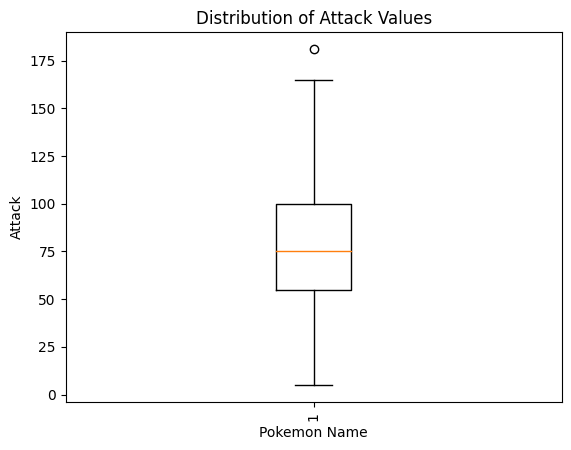

In [21]:
labelx = pokemon_df['name']
labely = pokemon_df['attack']

plot.boxplot(labely)
plot.xticks(rotation=90)
plot.xlabel('Pokemon Name')
plot.ylabel('Attack')
plot.title('Distribution of Attack Values')

plot.show()

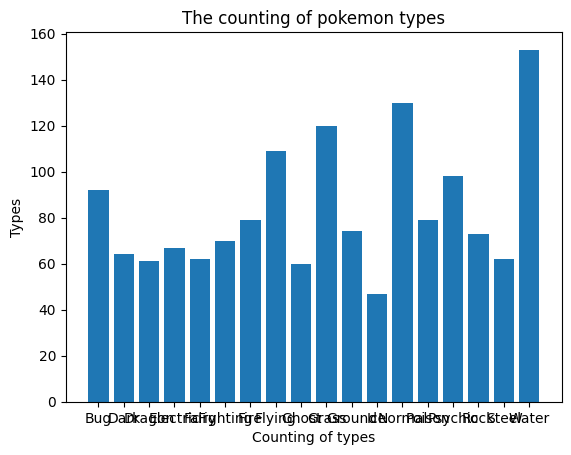

In [32]:
# counting the types 
count_1 = pokemon_df['type_1'].value_counts()
count_2 = pokemon_df['type_2'].value_counts()

# getting the label names
label_names = pokemon_df['type_1'].unique()

# sum the count of types
labely = count_1 + count_2

# create a line plot
plot.bar(labely.index, labely.values)

# add labels and title
plot.xlabel('Counting of types')
plot.ylabel('Types')
plot.title('The counting of pokemon types')

plot.show()